# **Exercise 6: Policy Gradient Methods**
**University of Zurich - Fall Semester 2024**

Giorgia Ramponi & Sean Boos


## **Theory Recap**
Gradient methods in reinforcement learning refer to techniques that optimize policies by adjusting parameters in the direction of the gradient of a performance measure (such as the expected return). Unlike action-value methods, which learn action-value functions and derive policies from them, gradient methods directly learn a parameterized policy that specifies the probability of taking certain actions in each state. The primary goal is to find the optimal policy parameters that maximize the performance measure.

**Some Key Properties of Gradient Methods:**

* **Direct Policy Optimization:** Gradient methods update the policy parameters at each step based on the estimated gradient of the performance with respect to these parameters. This enables the agent to learn a policy directly without relying on action-value estimates.

* **Handling Continuous Action Spaces:** These methods are well-suited for problems with continuous action spaces, where representing action values for each possible action is impractical.

* **Learning Exploration Strategies:** Gradient methods can learn policies that adjust the level of exploration automatically. Over time, they can approach deterministic policies, which take specific actions with high probability, while still being able to maintain some degree of exploration if needed.

A comment on notation to avoid confusion:  
Sometimes $ \nabla \ln \pi(A_t | S_t, \theta_t) $ is used and other times $ \frac{\nabla \pi(A_t | S_t, \theta_t)}{\pi(A_t | S_t, \theta_t)} $ is used. These two are identical. This comes from the fact that $ \nabla \ln x = \frac{\nabla x}{x} $.


## **Theoretical Exercises**

### **Question 1**
We know that:
$$
\begin{align*}
\nabla J(\theta) &= \mathbb{E}_\pi \left[ \sum_a \pi(a | S_t, \theta) q_\pi(S_t, a) \frac{\nabla \pi(a | S_t, \theta)}{\pi(a | S_t, \theta)} \right] \\
&= \mathbb{E}_\pi \left[ q_\pi(S_t, A_t) \frac{\nabla \pi(A_t | S_t, \theta)}{\pi(A_t | S_t, \theta)} \right] \quad \text{(replacing $a$ by the sample $A_t \sim \pi$)} \\
&= \mathbb{E}_\pi \left[ G_t \frac{\nabla \pi(A_t | S_t, \theta)}{\pi(A_t | S_t, \theta)} \right], \quad \text{(because $\mathbb{E}_\pi[G_t | S_t, A_t] = q_\pi(S_t, A_t)$)}
\end{align*}
$$

Show that we can generalize this to the following. Where $b(s)$ is any function of $s$.

$$
\nabla J(\theta) = \mathbb{E}_\pi \left[ ( q_\pi(S_t, A_t) - b(s) ) \frac{\nabla \pi(A_t | S_t, \theta)}{\pi(A_t | S_t, \theta)} \right]
$$


### **Solution**
$$
\begin{align*}
\nabla J(\theta) &= \mathbb{E}_\pi \left[ q_\pi(S_t, A_t) \frac{\nabla \pi(A_t | S_t, \theta)}{\pi(A_t | S_t, \theta)} \right] \\
&= \mathbb{E}_\pi \left[ (q_\pi(S_t, A_t) - b(S_t) + b(S_t)) \frac{\nabla \pi(A_t | S_t, \theta)}{\pi(A_t | S_t, \theta)} \right] \quad \text{(adding and subtracting $b(S_t)$)} \\
&= \mathbb{E}_\pi \left[ (q_\pi(S_t, A_t) - b(S_t)) \frac{\nabla \pi(A_t | S_t, \theta)}{\pi(A_t | S_t, \theta)} \right] + \mathbb{E}_\pi \left[ b(S_t) \frac{\nabla \pi(A_t | S_t, \theta)}{\pi(A_t | S_t, \theta)} \right] \quad \text{(splitting the expectation)} \\
&= \mathbb{E}_\pi \left[ (q_\pi(S_t, A_t) - b(S_t)) \frac{\nabla \pi(A_t | S_t, \theta)}{\pi(A_t | S_t, \theta)} \right] \quad \text{(the second term is zero)} \\
&= \mathbb{E}_\pi \left[ (q_\pi(S_t, A_t) - b(S_t)) \frac{\nabla \pi(A_t | S_t, \theta)}{\pi(A_t | S_t, \theta)} \right].
\end{align*}
$$
Why is the second term zero?
$$
b(S_t) \mathbb{E}_\pi \left[ \nabla_\theta \log \pi(A_t | S_t, \theta) \right] = 0
$$

1. Start with the expectation of the gradient of the log probability:
$$
\mathbb{E}_\pi \left[ \nabla_\theta \log \pi(A_t | S_t, \theta) \right] = \int \nabla_\theta \log \pi(A_t | S_t, \theta) \pi(A_t | S_t, \theta) dA_t
$$

2. Using the logarithmic derivative trick:
$$
\nabla_\theta \log \pi(A_t | S_t, \theta) = \frac{\nabla_\theta \pi(A_t | S_t, \theta)}{\pi(A_t | S_t, \theta)}
$$
Substituting this into the expectation:
$$
\mathbb{E}_\pi \left[ \nabla_\theta \log \pi(A_t | S_t, \theta) \right] = \int \frac{\nabla_\theta \pi(A_t | S_t, \theta)}{\pi(A_t | S_t, \theta)} \pi(A_t | S_t, \theta) dA_t
$$

3. The $\pi(A_t | S_t, \theta)$ cancels out:
$$
\int \nabla_\theta \pi(A_t | S_t, \theta) dA_t = \nabla_\theta \int \pi(A_t | S_t, \theta) dA_t
$$

4. Since the policy $\pi(A_t | S_t, \theta)$ is a probability distribution, we know:
$$
\int \pi(A_t | S_t, \theta) dA_t = 1
$$
And the gradient of a constant is zero:
$$
\nabla_\theta 1 = 0
$$

5. Therefore:
$$
\mathbb{E}_\pi \left[ \nabla_\theta \log \pi(A_t | S_t, \theta) \right] = 0
$$

6. Since the expectation is zero, multiplying by $b(S_t)$ also gives:
$$
b(S_t) \mathbb{E}_\pi \left[ \nabla_\theta \log \pi(A_t | S_t, \theta) \right] = 0
$$



### **Question 2**
The gaussian policy parametrization is given by the following equation.
$$
\pi(a \mid s, \boldsymbol{\theta}) \doteq \frac{1}{\sigma(s, \boldsymbol{\theta}) \sqrt{2 \pi}} \exp \left(-\frac{(a-\mu(s, \boldsymbol{\theta}))^2}{2 \sigma(s, \boldsymbol{\theta})^2}\right)
$$


Where $\mu : S \times \mathbb{R}^{d'} \to \mathbb{R}$ and $\sigma : S \times \mathbb{R}^{d'} \to \mathbb{R}^+ $ are two parameterized function approximators.
The two functions $ \mu(s, \theta) $ and $ \sigma(s, \theta) $ are defined as follows.

$$
\mu(s, \theta) \doteq \theta_\mu^\top \mathbf{x}_\mu(s) \quad \text{and} \quad \sigma(s, \theta) \doteq \exp\left( \theta_\sigma^\top \mathbf{x}_\sigma(s) \right),
$$

Show that for this policy parametrization the eligibility vector has the following two parts:

**a.)**
$$
\begin{aligned}
&\nabla \ln \pi\left(a \mid s, \boldsymbol{\theta}_\mu\right)=\frac{\nabla \pi\left(a \mid s, \boldsymbol{\theta}_\mu\right)}{\pi(a \mid s, \boldsymbol{\theta})}=\frac{1}{\sigma(s, \boldsymbol{\theta})^2}(a-\mu(s, \boldsymbol{\theta})) \mathbf{x}_\mu(s)
\end{aligned}
$$
**b. )**
$$
\begin{aligned}
&\nabla \ln \pi\left(a \mid s, \boldsymbol{\theta}_\sigma\right)=\frac{\nabla \pi\left(a \mid s, \boldsymbol{\theta}_\sigma\right)}{\pi(a \mid s, \boldsymbol{\theta})}=\left(\frac{(a-\mu(s, \boldsymbol{\theta}))^2}{\sigma(s, \boldsymbol{\theta})^2}-1\right) \mathbf{x}_\sigma(s)
\end{aligned}
$$



### **Solution**

**Given: Gaussian Policy**

The policy is parameterized as:  
$$
\pi(a | s, \theta) = \frac{1}{\sqrt{2\pi\sigma(s, \theta)^2}} \exp\left(-\frac{(a - \mu(s, \theta))^2}{2\sigma(s, \theta)^2}\right),
$$  
where $ \mu(s, \theta) $ is the mean and $ \sigma(s, \theta) $ is the standard deviation defined as follows.
$$
\mu(s, \theta) \doteq \theta_\mu^\top \mathbf{x}_\mu(s) \quad \text{and} \quad \sigma(s, \theta) \doteq \exp\left( \theta_\sigma^\top \mathbf{x}_\sigma(s) \right),
$$

**Step 1: Log of the Policy**  
Take the logarithm of the policy:  
$$
\ln \pi(a | s, \theta) = -\frac{1}{2} \ln(2\pi) - \ln \sigma(s, \theta) - \frac{(a - \mu(s, \theta))^2}{2\sigma(s, \theta)^2}.
$$

**Part a: Partial Derivative with Respect to $ \theta_\mu $**  
Let's compute the gradient of the log-policy with respect to $ \theta_\mu $, which parameterizes the mean function $ \mu(s, \theta) $.

1. Derivative of the first term $ -\frac{1}{2} \ln(2\pi) $:  
   $$
   \frac{\partial}{\partial \theta_\mu} \left( -\frac{1}{2} \ln(2\pi) \right) = 0 \quad (\text{constant term})
   $$

2. Derivative of the second term $ -\ln \sigma(s, \theta) $:  
   $$
   \frac{\partial}{\partial \theta_\mu} \left( -\ln \sigma(s, \theta) \right) = 0 \quad (\text{independent of } \theta_\mu)
   $$

3. Derivative of the third term:  
   $$
   \frac{\partial}{\partial \theta_\mu} \left( -\frac{(a - \mu(s, \theta))^2}{2\sigma(s, \theta)^2} \right) = -\frac{1}{2\sigma(s, \theta)^2} \cdot \frac{\partial}{\partial \theta_\mu} \left( (a - \mu(s, \theta))^2 \right).
   $$  
   Using the chain rule:  
   $$
   \frac{\partial}{\partial \theta_\mu} (a - \mu(s, \theta))^2 = 2(a - \mu(s, \theta)) \left( -\frac{\partial \mu(s, \theta)}{\partial \theta_\mu} \right).
   $$
   Given $ \mu(s, \theta) = \theta_\mu^\top \mathbf{x}_\mu(s) $, we have
   $$
   \frac{\partial \mu(s, \theta)}{\partial \theta_\mu} = \mathbf{x}_\mu(s).
   $$

4. Putting everything together:
   $$
   \frac{\partial}{\partial \theta_\mu} \ln \pi(a | s, \theta) = 0 + 0 - \frac{1}{2\sigma(s, \theta)^2} \cdot 2(a - \mu(s, \theta)) (-\mathbf{x}_\mu(s)).
   $$  
   Simplifying, we get:
   $$
   \frac{\partial}{\partial \theta_\mu} \ln \pi(a | s, \theta) = \frac{(a - \mu(s, \theta))}{\sigma(s, \theta)^2} \mathbf{x}_\mu(s).
   $$

**Part b: Partial Derivative with Respect to $ \theta_\sigma $**  
Now, compute the gradient of the log-policy with respect to $ \theta_\sigma $, which parameterizes the standard deviation function $ \sigma(s, \theta) $.

1. Derivative of the first term $ -\frac{1}{2} \ln(2\pi) $:  
   $$
   \frac{\partial}{\partial \theta_\sigma} \left( -\frac{1}{2} \ln(2\pi) \right) = 0 \quad (\text{constant term})
   $$

2. Derivative of the second term $ -\ln \sigma(s, \theta) $:  
   $$
   \frac{\partial}{\partial \theta_\sigma} \left( -\ln \sigma(s, \theta) \right) = -\frac{1}{\sigma(s, \theta)} \frac{\partial \sigma(s, \theta)}{\partial \theta_\sigma}.
   $$
   Given $ \sigma(s, \theta) = \exp\left( \theta_\sigma^\top \mathbf{x}_\sigma(s) \right) $, we have
   $$
   \frac{\partial \sigma(s, \theta)}{\partial \theta_\sigma} = \sigma(s, \theta) \mathbf{x}_\sigma(s).
   $$

3. Derivative of the third term:  
   $$
   \frac{\partial}{\partial \theta_\sigma} \left( -\frac{(a - \mu(s, \theta))^2}{2\sigma(s, \theta)^2} \right) = \frac{(a - \mu(s, \theta))^2}{\sigma(s, \theta)^3} \frac{\partial \sigma(s, \theta)}{\partial \theta_\sigma}.
   $$

4. Putting everything together:
   $$
   \frac{\partial}{\partial \theta_\sigma} \ln \pi(a | s, \theta) = 0 - \frac{1}{\sigma(s, \theta)} \sigma(s, \theta) \mathbf{x}_\sigma(s) + \frac{(a - \mu(s, \theta))^2}{\sigma(s, \theta)^3} \sigma(s, \theta) \mathbf{x}_\sigma(s).
   $$
   Simplifying, we get:
   $$
   \nabla \ln \pi(a | s, \theta_\sigma) = \left( \frac{(a - \mu(s, \theta))^2}{\sigma(s, \theta)^2} - 1 \right) \mathbf{x}_\sigma(s).
   $$


**Summary of the Final Expressions**

1. For $ \theta_\mu $:  
   $$
   \nabla \ln \pi(a | s, \theta_\mu) = \frac{(a - \mu(s, \theta))}{\sigma(s, \theta)^2} \mathbf{x}_\mu(s).
   $$

2. For $ \theta_\sigma $:  
   $$
   \nabla \ln \pi(a | s, \theta_\sigma) = \left( \frac{(a - \mu(s, \theta))^2}{\sigma(s, \theta)^2} - 1 \right) \mathbf{x}_\sigma(s).
   $$


## **Coding Exercise**

### **Setup**
In this exercise, we will implement REINFORCE and REINFORCE with Baseline for a simple grid world problem. Our agent randomly spawns on a field in a 5 x 5 grid. The agent's goal is to reach the field in the lower right corner. Each action yields a reward of -0.1 unless it leads the agent to the target field, in which case the action yields a reward of 0. The possible actions are moving right, left, up, and down. If the agent's move would cause it to leave the grid, the agent simply remains on the same field.

In [1]:
import torch
import torch.nn as nn
from tqdm import tqdm
import numpy as np
from torch.autograd import grad
import random
import matplotlib.pyplot as plt

In [2]:
class Grid:
    def __init__(self, n, m, exit_pos, figure_pos):
        self.n = n
        self.m = m
        self.exit_pos = exit_pos
        self.figure_pos = figure_pos

    def move(self, direction):
        x, y = self.figure_pos
        if direction == "up":
            if y < self.n-1:
                self.figure_pos = (x, y+1)
        elif direction == "down":
            if y > 0:
                self.figure_pos = (x, y-1)
        elif direction == "left":
            if x > 0:
                self.figure_pos = (x-1, y)
        elif direction == "right":
            if x < self.m-1:
                self.figure_pos = (x+1, y)

    def is_at_exit(self):
        return self.figure_pos == self.exit_pos

    def get_state(self, device):
        return torch.FloatTensor(self.figure_pos).unsqueeze(0).to(device)

### **REINFORCE**
For the REINFORCE algorithm we need a differentiable function that gives us a probability distribution over the possible actions (the policy). We use a neural network implemented via PyTorch. PyTorch has automatic differentiation implemented. This means we will not have to derive the gradient ourself, simplifying the implementation.

In this implementation we use a two layer network with a softmax layer at the end. The soft max function ensures that the outputs are within 0 and 1 and sum to one. This means the output can be interpreted as a probability.

In this exercise, we implement the REINFORCE algorithm and REINFORCE with Baseline for a simple grid world problem. The agent is placed randomly on a $5 \times 5$ grid, aiming to reach the bottom-right corner. Each action yields a reward of $-0.1$, except when reaching the target, which gives a reward of $0$. The possible actions are moving right, left, up, or down. If an action would take the agent outside the grid boundaries, the agent remains in the same position.

The policy is represented by a neural network that outputs a probability distribution over actions, parameterized by $\theta$. The action probabilities are computed using the softmax function:
$$
\text{softmax}(z)_i = \frac{e^{z_i}}{\sum_{j} e^{z_j}},
$$
which maps $\mathbb{R}^n$ to $(0, 1)^n$ such that the outputs sum to $1$.



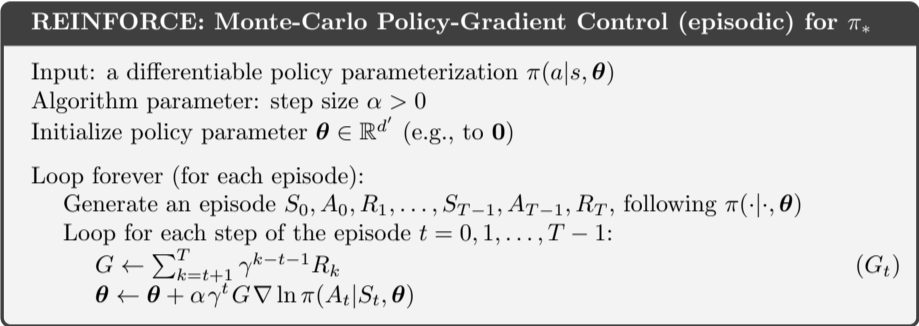

###**Exercise 1: Policy Network**
The policy network consists of two fully connected layers. The input layer has 2 units, corresponding to the agent's coordinates on the grid. The first hidden layer has 16 units with ReLU activation, and the output layer has 4 units, representing the action probabilities. The softmax function is applied to the output layer to produce a probability distribution over the actions.

Implement it below using the given skeleton.

In [ ]:
class PolicyNet(nn.Module):
    def __init__(self):
        super(PolicyNet, self).__init__()
        # TODO: Define the two required layers


    def forward(self, x):
        # TODO: Implement the forward pass
        # Hint: Use nn.functional.relu for the ReLU activation function

        return

### **Solution**

In [3]:
class PolicyNet(nn.Module):
    def __init__(self):
        super(PolicyNet, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 4)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        x = nn.functional.softmax(x, dim=1)
        return x

The following function generates episodes based on the current policy.
1. **Start and End**: An episode begins in an initial state and terminates when a terminal state is reached, such as achieving the goal, hitting a failure condition, or completing a fixed number of time steps.

2. **Trajectory**: During an episode, the agent generates a sequence of states, actions, and rewards, represented as:
   $$
   (S_0, A_0, R_1, S_1, A_1, R_2, \ldots, S_T),
   $$
   where $S_t$ is the state at time $t$, $A_t$ is the action taken, $R_t$ is the reward received after transitioning to $S_t$, and $T$ denotes the final time step of the episode.



In [4]:
def generate_episode(grid, policy_net, device="cpu", max_episode_len = 100):
    state = grid.get_state(device)
    ep_length = 0
    while not grid.is_at_exit():
        # Convert state to tensor and pass through policy network to get action probabilities
        ep_length+=1
        action_probs = policy_net(state).squeeze()
        log_probs = torch.log(action_probs)
        cpu_action_probs = action_probs.detach().cpu().numpy()
        action = np.random.choice(np.arange(4), p=cpu_action_probs)

        # Take the action and get the new state and reward
        grid.move(actions[action])
        next_state = grid.get_state(device)
        reward = -0.1 if not grid.is_at_exit() else 0

        # Add the state, action, and reward to the episode
        new_episode_sample = (state, action, reward)
        yield new_episode_sample, log_probs

        # We do not want to add the state, action, and reward for reaching the exit position
        if reward == 0:
            break

        # Update the current state
        state = next_state
        if ep_length > max_episode_len:
            return

    # Add the final state, action, and reward for reaching the exit position
    new_episode_sample = (grid.get_state(device), None, 0)
    yield new_episode_sample, log_probs

The following function will be used later to define the update step:
$$
\theta \leftarrow \theta + \beta \nabla \theta,
$$
where $\theta$ represents the parameter vector, $\alpha$ is the learning rate, and $\nabla \theta$ denotes the gradient of the objective function with respect to $\theta$. The gradient_wrt_params function calculates the gradient with respect to the parameters and stores it in param.grad.


In [5]:
def gradients_wrt_params(
    net: torch.nn.Module, loss_tensor: torch.Tensor
):
    # Dictionary to store gradients for each parameter
    # Compute gradients with respect to each parameter
    for name, param in net.named_parameters():
        g = grad(loss_tensor, param, retain_graph=True)[0]
        param.grad = g

def update_params(net: torch.nn.Module, lr: float) -> None:
    # Update parameters for the network
    for name, param in net.named_parameters():
        param.data += lr * param.grad

The following function are helper function initializing a valid grid and visualizing the training of the algorithm.

In [6]:
def get_good_starting_grid(n=5, m=5):
    exit_pos = (4, 4)

    # Randomly select a figure position that is not the same as the exit
    while True:
        figure_pos = (random.randint(0, n-1), random.randint(0, m-1))
        if figure_pos != exit_pos:
            break

    # Create and return the Grid instance
    return Grid(n, m, exit_pos, figure_pos)


In [7]:
actions = ["up", "down", "left", "right"]

def visualize_training(grid, trajectory, episode_num):
    """
    Visualizes the grid and the agent's trajectory during training.

    Parameters:
    - grid: The Grid object representing the environment.
    - trajectory: A list of positions representing the agent's path during the episode.
    - episode_num: The current episode number, used for the plot title.
    """
    n, m = grid.n, grid.m
    fig, ax = plt.subplots(figsize=(6, 6))

    # Draw the grid lines
    for i in range(n + 1):
        ax.plot([0, m], [i, i], color="black")
    for j in range(m + 1):
        ax.plot([j, j], [0, n], color="black")

    # Highlight the exit position
    exit_x, exit_y = grid.exit_pos
    ax.add_patch(plt.Rectangle((exit_x, exit_y), 1, 1, color="green", alpha=0.5))

    # Draw the agent's trajectory
    for idx, (x, y) in enumerate(trajectory):
        if idx == len(trajectory) - 1:
            # Final position (exit)
            ax.add_patch(plt.Circle((x + 0.5, y + 0.5), 0.3, color="red"))
        else:
            # Path leading to the exit
            ax.add_patch(plt.Circle((x + 0.5, y + 0.5), 0.2, color="blue", alpha=0.7))

    # Set the axis limits and labels
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Episode {episode_num}")

    # Display the plot
    plt.gca().invert_yaxis()  # Invert the y-axis to match the typical grid orientation
    plt.show()

def generate_episode_with_trajectory(grid, policy_net, device="cpu", max_episode_len=100):
    """
    Generates an episode and returns the episode data along with the trajectory of the agent.

    Parameters:
    - grid: The Grid object representing the environment.
    - policy_net: The policy network.
    - device: The device to run the computations on.
    - max_episode_len: The maximum length of the episode.

    Returns:
    - episode: A list of (state, action, reward) tuples.
    - trajectory: A list of positions representing the agent's path.
    """
    state = grid.get_state(device)
    ep_length = 0
    trajectory = [grid.figure_pos]  # Record the starting position

    episode = []
    while not grid.is_at_exit():
        ep_length += 1
        action_probs = policy_net(state).squeeze()
        log_probs = torch.log(action_probs)
        cpu_action_probs = action_probs.detach().cpu().numpy()
        action = np.random.choice(np.arange(4), p=cpu_action_probs)

        # Take the action and get the new state and reward
        grid.move(actions[action])
        next_state = grid.get_state(device)
        reward = -0.1 if not grid.is_at_exit() else 0

        # Add the state, action, and reward to the episode
        new_episode_sample = (state, action, reward)
        episode.append((new_episode_sample, log_probs))

        # Update the trajectory
        trajectory.append(grid.figure_pos)

        # We do not want to add the state, action, and reward for reaching the exit position
        if reward == 0:
            break

        # Update the current state
        state = next_state
        if ep_length > max_episode_len:
            break

    # Add the final state, action, and reward for reaching the exit position
    new_episode_sample = (grid.get_state(device), None, 0)
    episode.append((new_episode_sample, log_probs))

    return episode, trajectory


### **Exercise 2: The REINFORCE Algorithm**
In the following we will implement the REINFORCE Algorithm.
We will need to calculate G and pass the correct learning rate to our function "update_params" that does $\theta \leftarrow \theta + \beta \nabla \theta$. A quick reminder, the reward for each action is -0.1 unless it leads to the target field. For this last action the reward is 0.

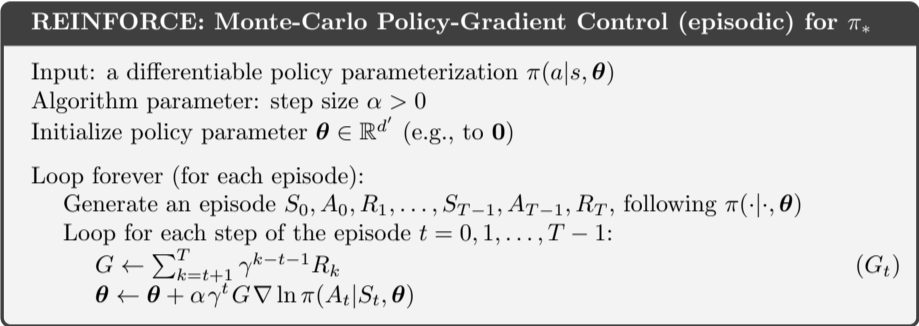

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

policy_net = PolicyNet()
policy_net.to(device)

lengths = []
rewards = []
rewards_G0 = []

gamma = 0.99
lr_policy_net = 2**-13
optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr_policy_net)


# Training loop with visualization
for episode_num in tqdm(range(2500)):
    all_iterations = []
    all_log_probs = []
    grid = get_good_starting_grid()
    episode, trajectory = generate_episode_with_trajectory(grid, policy_net=policy_net, device=device)
    lengths.append(len(episode))
    loss = 0
    for t, ((state, action, reward), log_probs) in enumerate(episode[:-1]):
        # TODO: Calculate G (the variable gamma was intialized above)
        ###### Your Code Starts Here ######

        ###### Your Code Ends Here ######
        if t == 0:
          rewards_G0.append(G)
        rewards.append(G.item())
        policy_loss = log_probs[action]
        optimizer.zero_grad()
        gradients_wrt_params(policy_net, policy_loss)
        # TODO: Pass the correct beta to our function update_params(policy_net, beta) that does theta <- teta + beta * gradient of theta
        ###### Your Code Starts Here ######
        beta = 0
        ###### Your Code Ends Here ######
        update_params(policy_net, beta)

    # Visualize every 100 episodes
    if episode_num % 100 == 0:
        visualize_training(grid, trajectory, episode_num)


KeyboardInterrupt: 

### **Solution**

  0%|          | 0/2500 [00:00<?, ?it/s]

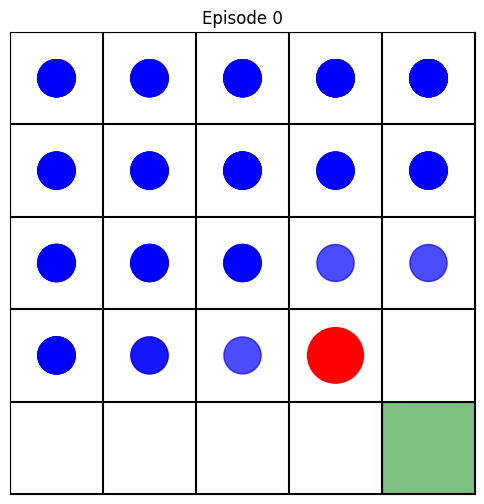

  4%|▍         | 97/2500 [00:08<01:53, 21.19it/s]

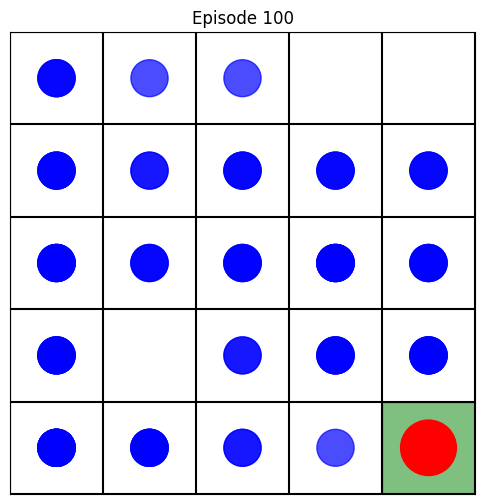

  8%|▊         | 199/2500 [00:12<00:58, 39.18it/s]

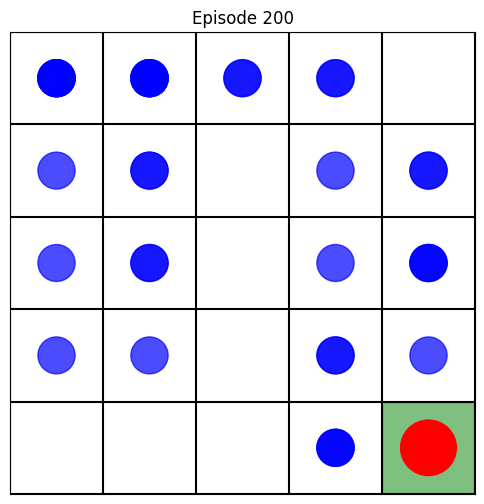

 12%|█▏        | 292/2500 [00:15<01:07, 32.91it/s]

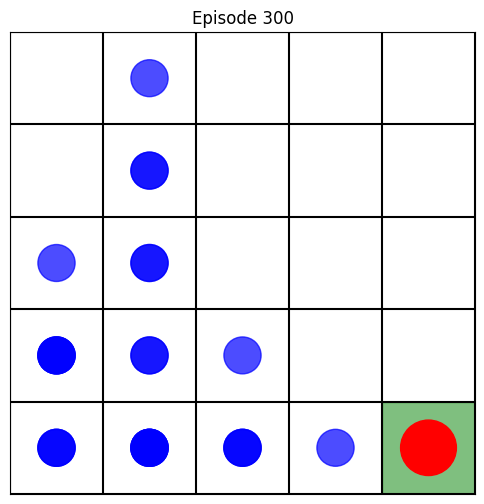

 16%|█▌        | 395/2500 [00:17<00:31, 67.84it/s]

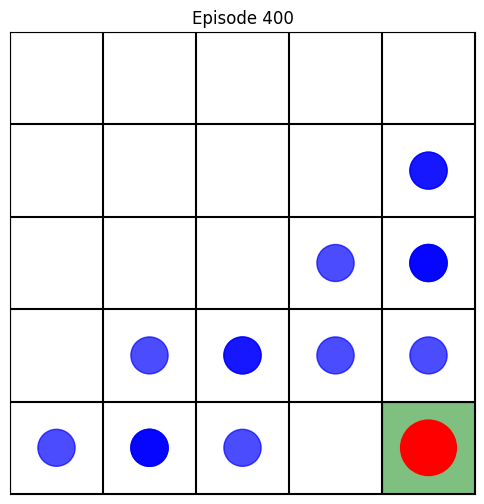

 20%|█▉        | 497/2500 [00:19<00:26, 75.42it/s]

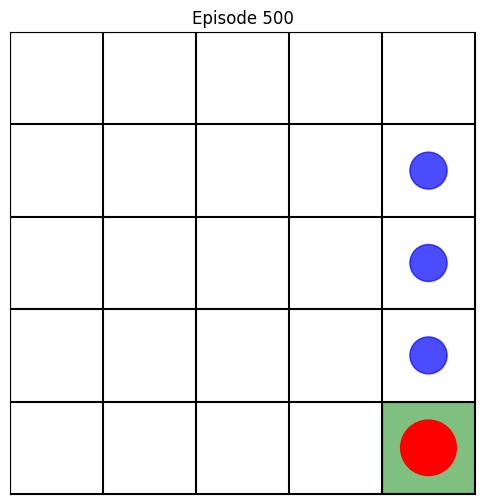

 24%|██▍       | 597/2500 [00:20<00:24, 77.70it/s]

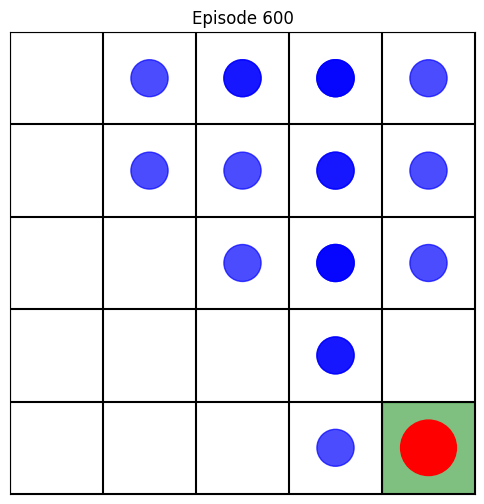

 28%|██▊       | 694/2500 [00:21<00:21, 83.39it/s]

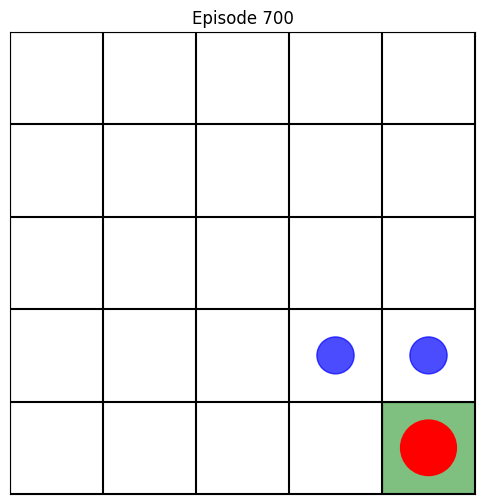

 32%|███▏      | 799/2500 [00:23<00:17, 97.52it/s]

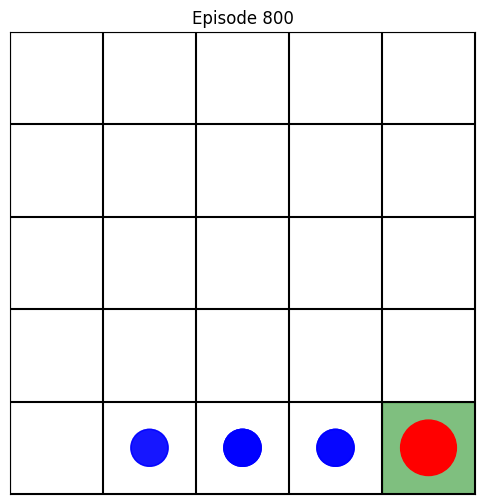

 36%|███▌      | 898/2500 [00:24<00:17, 89.10it/s]

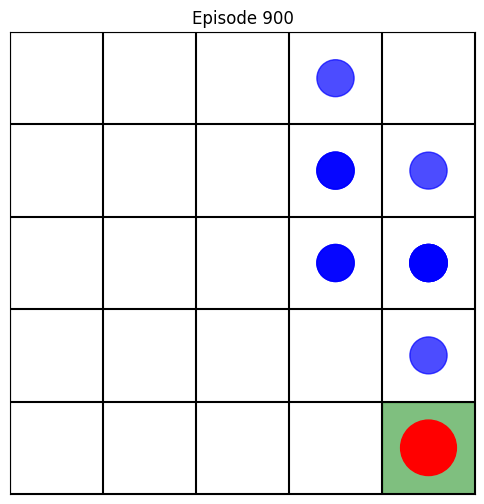

 40%|███▉      | 995/2500 [00:26<00:19, 78.79it/s]

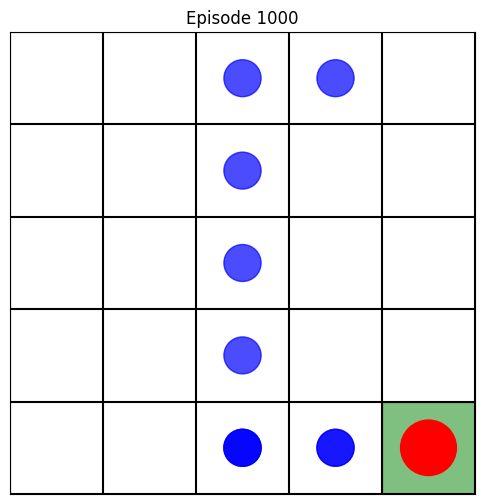

 44%|████▎     | 1092/2500 [00:27<00:21, 65.55it/s]

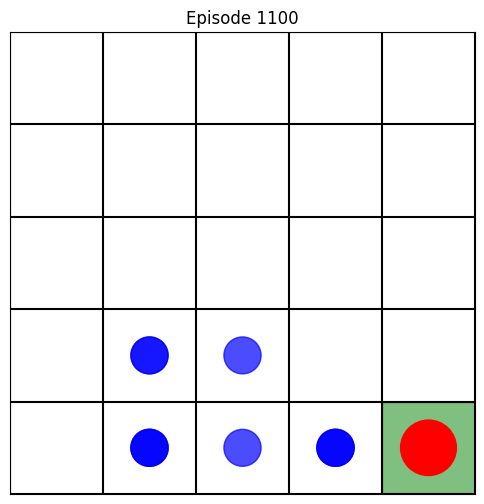

 48%|████▊     | 1200/2500 [00:29<00:12, 101.84it/s]

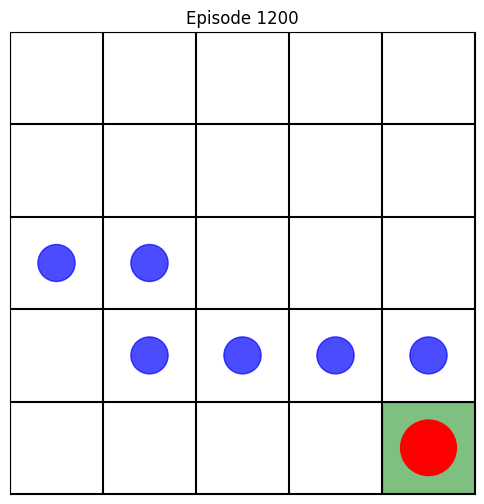

 52%|█████▏    | 1299/2500 [00:30<00:12, 99.46it/s] 

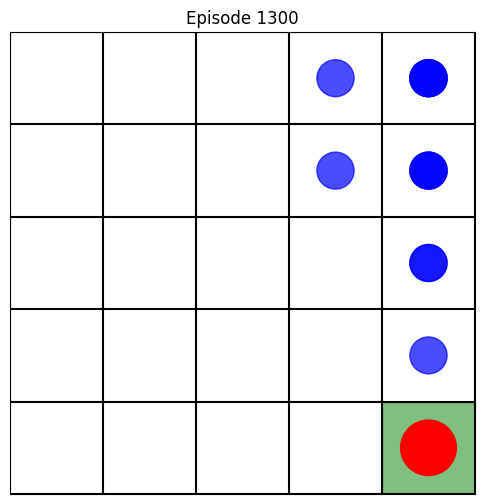

 56%|█████▌    | 1394/2500 [00:31<00:08, 127.11it/s]

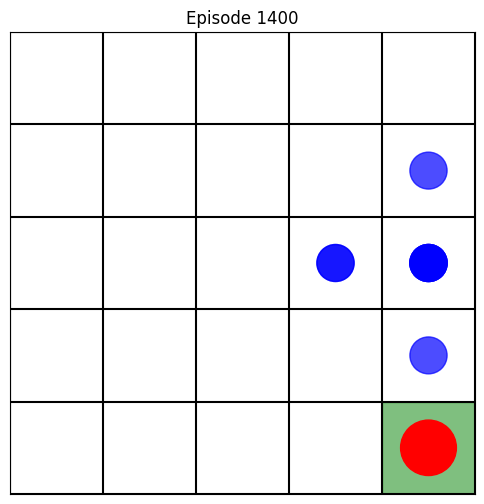

 60%|█████▉    | 1499/2500 [00:32<00:08, 122.29it/s]

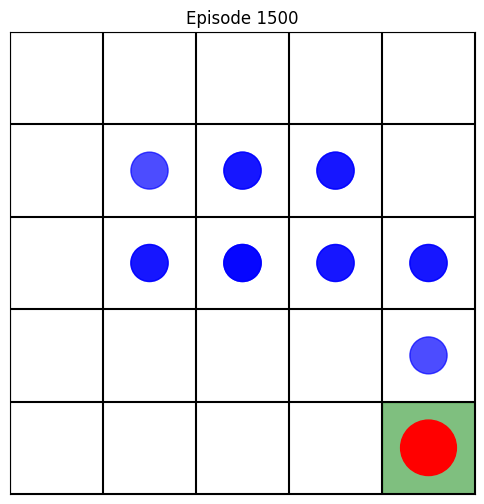

 64%|██████▎   | 1591/2500 [00:33<00:08, 103.18it/s]

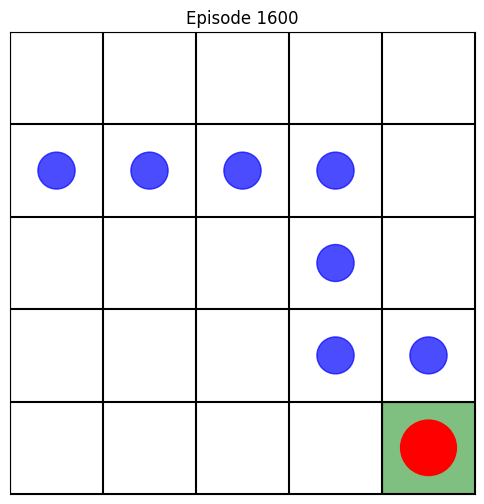

 68%|██████▊   | 1696/2500 [00:34<00:06, 121.25it/s]

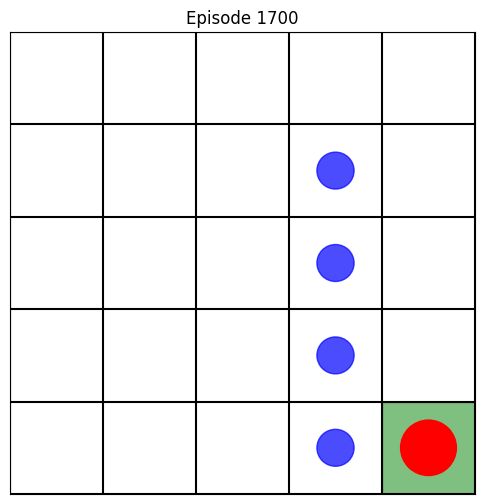

 72%|███████▏  | 1791/2500 [00:35<00:06, 118.09it/s]

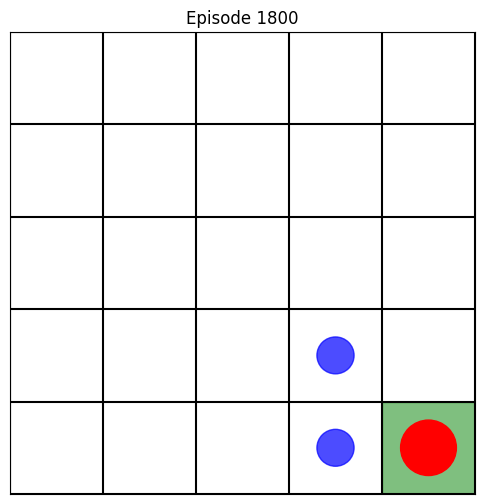

 76%|███████▌  | 1894/2500 [00:36<00:05, 113.00it/s]

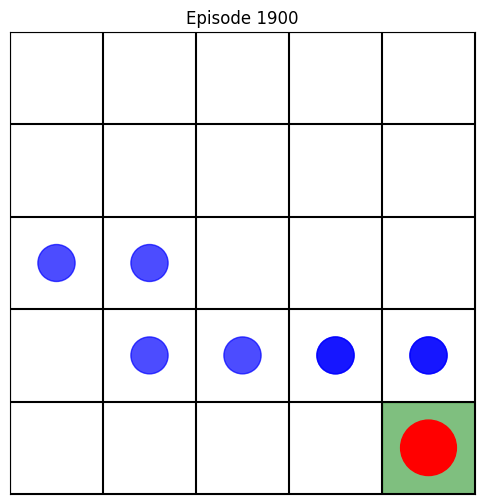

 80%|███████▉  | 1988/2500 [00:37<00:04, 125.94it/s]

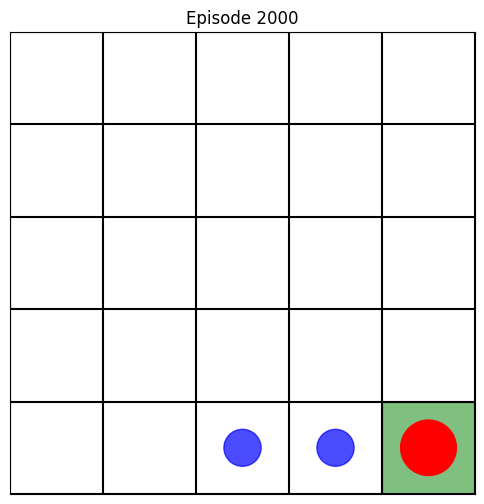

 83%|████████▎ | 2086/2500 [00:38<00:03, 126.62it/s]

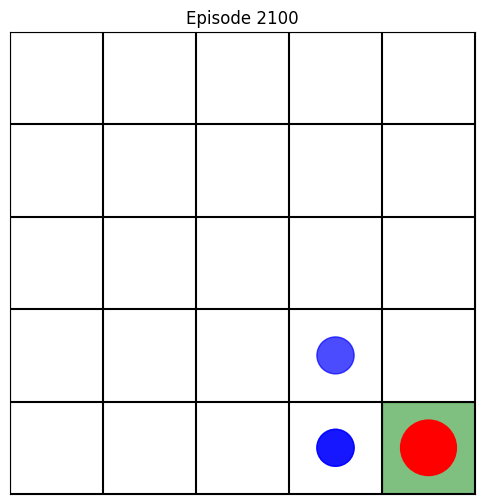

 88%|████████▊ | 2190/2500 [00:39<00:03, 99.26it/s]

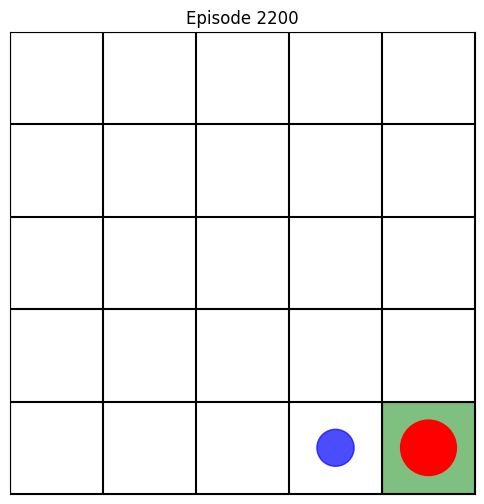

 92%|█████████▏| 2296/2500 [00:40<00:02, 86.31it/s]

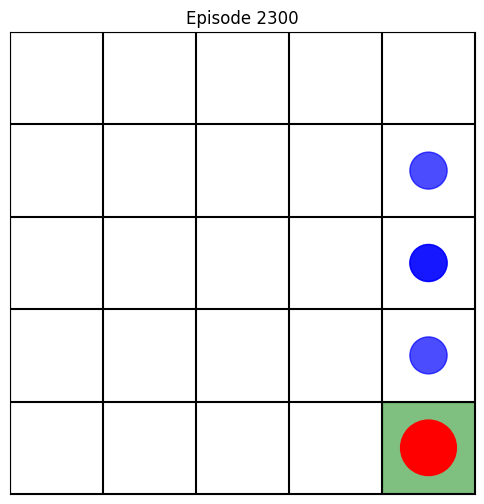

 96%|█████████▌| 2391/2500 [00:41<00:00, 114.75it/s]

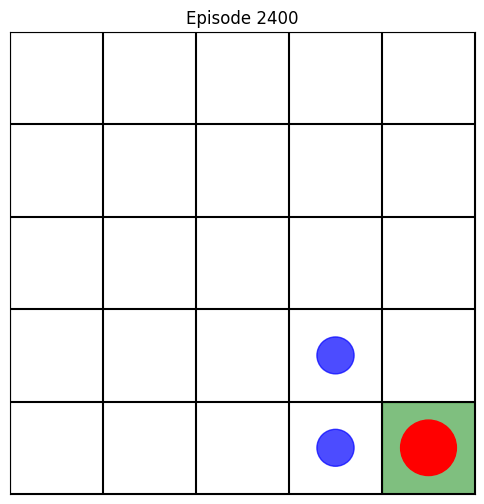

100%|██████████| 2500/2500 [00:42<00:00, 58.71it/s] 


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

policy_net = PolicyNet()
policy_net.to(device)

lengths = []
rewards = []
rewards_G0 = []

gamma = 0.99
lr_policy_net = 2**-13
optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr_policy_net)


# Training loop with visualization
for episode_num in tqdm(range(2500)):
    all_iterations = []
    all_log_probs = []
    grid = get_good_starting_grid()
    episode, trajectory = generate_episode_with_trajectory(grid, policy_net=policy_net, device=device)
    lengths.append(len(episode))
    loss = 0
    for t, ((state, action, reward), log_probs) in enumerate(episode[:-1]):
        gammas_vec = gamma ** (torch.arange(t + 1, len(episode)) - t - 1)
        G = -0.1 * torch.sum(gammas_vec)
        if t == 0:
          rewards_G0.append(G)
        rewards.append(G.item())
        policy_loss = log_probs[action]
        optimizer.zero_grad()
        gradients_wrt_params(policy_net, policy_loss)
        beta = lr_policy_net * G * gamma ** t
        update_params(policy_net, beta)

    # Visualize every 100 episodes
    if episode_num % 100 == 0:
        visualize_training(grid, trajectory, episode_num)


### **Visualization of the REINFORCE Algorithm**

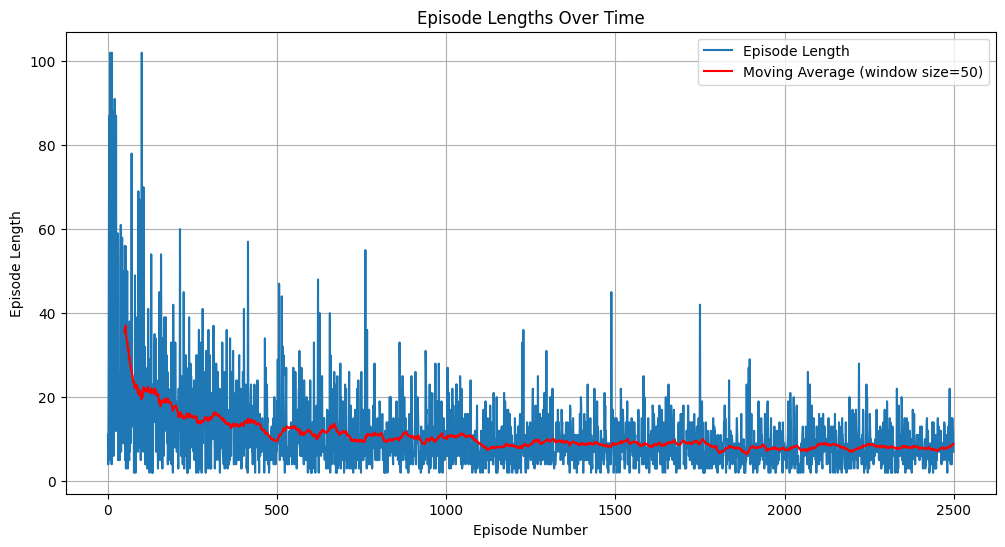

In [ ]:
def plot_episode_lengths(lengths, window_size=50):
    """
    Plots the episode lengths over time, with a moving average.

    Parameters:
    - lengths: List of episode lengths.
    - window_size: The window size for the moving average.
    """
    # Calculate the moving average
    moving_avg = np.convolve(lengths, np.ones(window_size) / window_size, mode='valid')

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(lengths, label="Episode Length")
    plt.plot(range(window_size - 1, len(lengths)), moving_avg, label=f"Moving Average (window size={window_size})", color="red")
    plt.xlabel("Episode Number")
    plt.ylabel("Episode Length")
    plt.title("Episode Lengths Over Time")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage after the training loop
plot_episode_lengths(lengths)


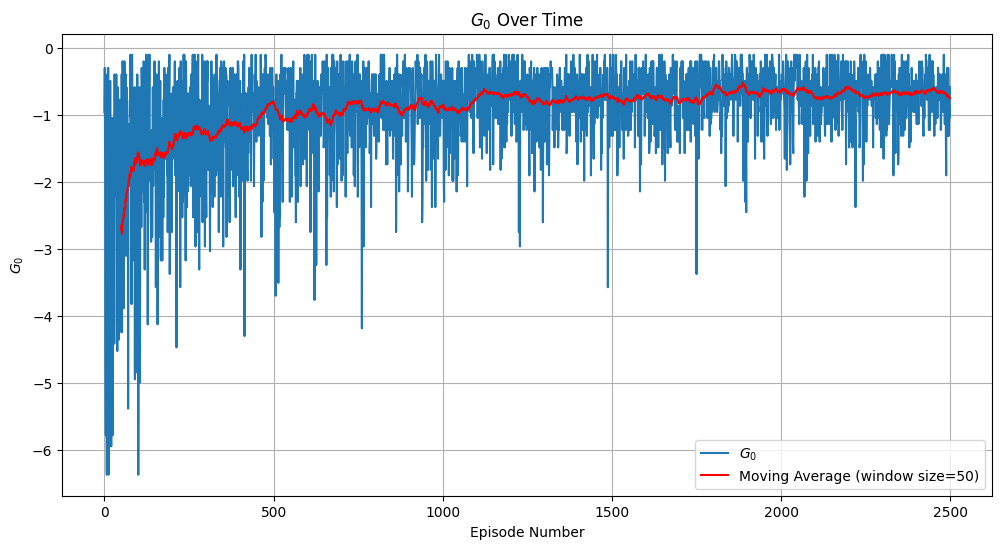

In [ ]:
def plot_rewards(lengths, window_size=50):
    """
    Plots the episode lengths over time, with a moving average.

    Parameters:
    - lengths: List of episode lengths.
    - window_size: The window size for the moving average.
    """
    # Calculate the moving average
    moving_avg = np.convolve(lengths, np.ones(window_size) / window_size, mode='valid')

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(lengths, label="$G_0$")
    plt.plot(range(window_size - 1, len(lengths)), moving_avg, label=f"Moving Average (window size={window_size})", color="red")
    plt.xlabel("Episode Number")
    plt.ylabel("$G_0$")
    plt.title("$G_0$ Over Time")
    plt.legend()
    plt.grid()
    plt.show()
plot_rewards(rewards_G0)

### **REINFORCE with Baseline**
The **REINFORCE** algorithm updates the policy parameters $\theta$ using the return $G_t$ as an estimate of the expected reward, with the update rule:
$$
\theta \leftarrow \theta + \alpha \gamma^t G_t \nabla_\theta \log \pi(A_t \mid S_t, \theta).
$$
However, using $G_t$ directly can lead to high variance in the gradient estimates.

**REINFORCE with Baseline** modifies this approach by subtracting a baseline value $b_t$ from the return, leading to the update:
$$
\theta \leftarrow \theta + \alpha \gamma^t (G_t - b_t) \nabla_\theta \log \pi(A_t \mid S_t, \theta).
$$
The baseline $b_t$ is typically chosen as an estimate of the value function, $V(S_t)$, and serves to reduce the variance of the gradient estimate while keeping it unbiased. This adjustment makes the learning process more stable and improves convergence compared to the original REINFORCE algorithm.


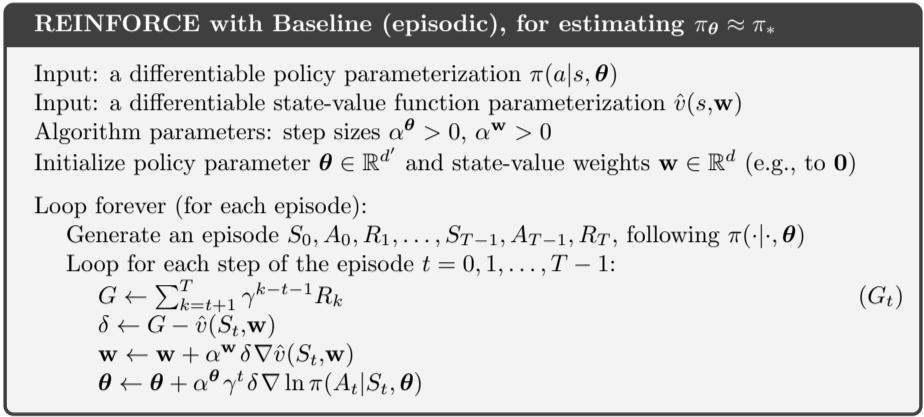

### **Exercise 3: Value Network**
In REINFORCE with Baseline we need a differentiable function to estimate the value of a given state so we can calculate $δ$. Again, we use a neural newtork. The architecture consists of two fully connected layers:
- The input layer has 2 units, corresponding to the agent's coordinates on the grid.
- The first hidden layer has 16 units and uses a ReLU activation function.
- The output layer has a single unit, representing the estimated value of the given state.

The network takes as input the state representation and outputs a scalar value estimate without any activation function in the output layer. Your task is to implement this network structure in the following skeleton.


In [ ]:
# New Value Network for the baseline
class ValueNet(nn.Module):
    def __init__(self):
        super(ValueNet, self).__init__()
        # TODO: Define the two required layers

    def forward(self, x):
      # TODO: Define the forward pass of the network
      return


### **Solution**

In [ ]:
# New Value Network for the baseline
class ValueNet(nn.Module):
    def __init__(self):
        super(ValueNet, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### **Exercise 4: REINFORCE with Baseline**

In the following you will have to define the REINFORCE with Baseline algorithm.
For this you will have to do the following.
- Calculate $G$
- Calculate $\delta$ given the baseline estimate
- Adjust the theta parameters by passing the correct $\beta$ to the update_params function

Reminder: update_params(network, $\beta$) does $\theta \leftarrow \theta + \beta \nabla \theta$.

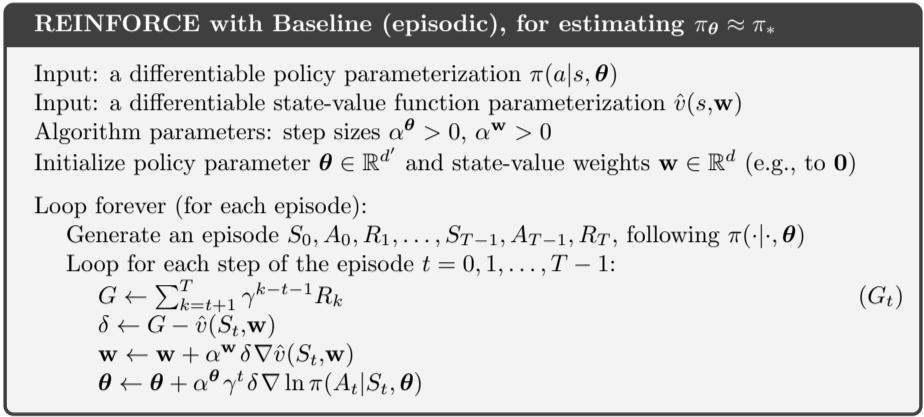

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

lengths = []
rewards = []
rewards_G0_baseline = []

gamma = 0.99

# Instantiate the PolicyNet
policy_net = PolicyNet()
policy_net.to(device)

# Optimizer for the PolicyNet
lr_policy_net = 2**-9
optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr_policy_net)

# Instantiate the ValueNet
value_net = ValueNet()
value_net.to(device)

# Optimizer for the ValueNet
lr_value_net = 2**-6
value_optimizer = torch.optim.Adam(value_net.parameters(), lr=lr_value_net)

# Modify the training loop to incorporate the baseline
for episode_num in tqdm(range(2500)):
    all_iterations = []
    all_log_probs = []
    grid = get_good_starting_grid()
    episode, trajectory = generate_episode_with_trajectory(grid, policy_net=policy_net, device=device)
    lengths.append(len(episode))
    loss = 0
    for t, ((state, action, reward), log_probs) in enumerate(episode[:-1]):
        # TODO: Compute the return G
        ##### Your Code Starts Here #####


        ##### Your Code Ends Here #######

        # Get the baseline value estimate from the ValueNet
        baseline = value_net(state).squeeze()

        # TODO: Calculate delta
        ##### Your Code Starts Here #####


        ##### Your Code Ends Here #######

        # Update the rewards list
        rewards.append(G.item())
        if t == 0:
          rewards_G0_baseline.append(G)

        # Policy loss using delta
        policy_loss = log_probs[action]
        optimizer.zero_grad()
        gradients_wrt_params(policy_net, policy_loss)

        #### TODO: Pass the correct beta to our function update_params(policy_net, beta) that does theta <- teta + beta * gradient of theta
        ##### Your Code Starts Here #####
        beta = 0
        ##### Your Code Ends Here #######
        update_params(policy_net, beta)

        # Value loss for the baseline update
        value_loss = baseline
        value_optimizer.zero_grad()
        gradients_wrt_params(value_net, value_loss)
        update_params(value_net, lr_value_net * delta)

### **Solution**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

policy_net = PolicyNet()
policy_net.to(device)

lengths = []
rewards = []
rewards_G0_baseline = []

gamma = 0.99
lr_policy_net = 2**-9
optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr_policy_net)

# Instantiate the ValueNet
value_net = ValueNet()
value_net.to(device)


# Optimizer for the ValueNet
lr_value_net = 2**-6
value_optimizer = torch.optim.Adam(value_net.parameters(), lr=lr_value_net)

# Modify the training loop to incorporate the baseline
for episode_num in tqdm(range(2500)):
    all_iterations = []
    all_log_probs = []
    grid = get_good_starting_grid()
    episode, trajectory = generate_episode_with_trajectory(grid, policy_net=policy_net, device=device)
    lengths.append(len(episode))
    loss = 0
    for t, ((state, action, reward), log_probs) in enumerate(episode[:-1]):
        # Compute the return G
        gammas_vec = gamma ** (torch.arange(t + 1, len(episode)) - t - 1)
        G = -0.1 * torch.sum(gammas_vec)

        # Get the baseline value estimate from the ValueNet
        baseline = value_net(state).squeeze()

        # Advantage calculation: G - baseline
        delta = G - baseline

        # Update the rewards list
        rewards.append(G.item())
        if t == 0:
          rewards_G0_baseline.append(G)

        # Policy loss using delta
        policy_loss = log_probs[action]
        optimizer.zero_grad()
        gradients_wrt_params(policy_net, policy_loss)
        beta = lr_policy_net * delta * gamma ** t
        update_params(policy_net, beta)

        # Value loss for the baseline update
        value_loss = baseline
        value_optimizer.zero_grad()
        gradients_wrt_params(value_net, value_loss)
        update_params(value_net, lr_value_net * delta)

100%|██████████| 2500/2500 [00:37<00:00, 66.30it/s] 


### **Comparing REINFORCE and REINFORCE with Baseline**

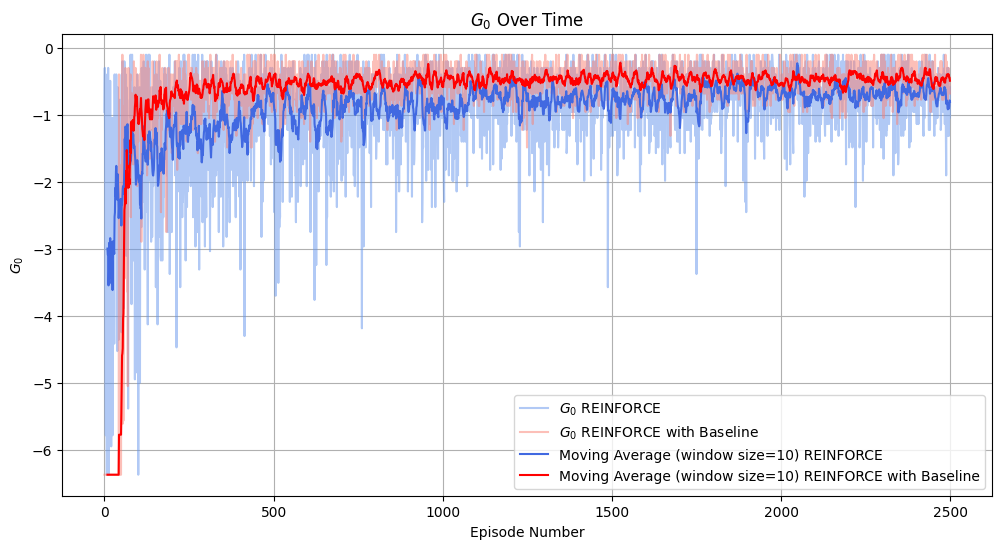

In [ ]:
moving_avg = np.convolve(rewards_G0, np.ones(10) / 10, mode='valid')
moving_avg_baseline = np.convolve(rewards_G0_baseline, np.ones(10) / 10, mode='valid')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(rewards_G0, label="$G_0$ REINFORCE", color='cornflowerblue', alpha=0.5)
plt.plot(rewards_G0_baseline, label="$G_0$ REINFORCE with Baseline", color='salmon', alpha=0.5)
plt.plot(range(10 - 1, len(rewards_G0)), moving_avg, label=f"Moving Average (window size={10}) REINFORCE", color="royalblue")
plt.plot(range(10 - 1, len(rewards_G0)), moving_avg_baseline, label=f"Moving Average (window size={10}) REINFORCE with Baseline", color="red")
plt.xlabel("Episode Number")
plt.ylabel("$G_0$")
plt.title("$G_0$ Over Time")
plt.legend()
plt.grid()
plt.show()

## References
* Sutton, R. S., & Barto, A. G. (2018). Reinforcement learning: An introduction (2nd ed.). MIT Press.
* https://medium.com/@sofeikov/reinforce-algorithm-reinforcement-learning-from-scratch-in-pytorch-41fcccafa107
